# HumanCapitalVsUnemployment – Focuses on the relationship between human capital investment and unemployment.

#### Lohit Gandham
 -------------------------------------------------

A research inquiry which seeks to examine the potential linkages between government expenditure on health and education and the unemployment rates within different national contexts. This examination is predicated on the assumption that increased investment in human capital development may correlate with labor market outcomes, particularly the rate of unemployment.

NOTE:  We didn't upload any .csv files as the dataset as both our world bank data and the external datasource have been taken directly from the net, so that we always have updated data with us.

### Introduction to the Study:

In framing the research question, the introduction lays out the rationale for examining the interplay between public sector investment in health and education and unemployment rates. Given the current economic debates concerning the role of government in fostering a conducive environment for employment generation, this study becomes particularly relevant.

The central thesis to be explored is whether a robust investment in the health and education sectors by governments correlates with lower unemployment rates, thus implying that such investment could be a strategic lever to enhance employment prospects.

### Clarification of Research Question:

The fundamental research question posed - whether there's a correlation between health and education spending and unemployment rates over time - aims to probe the existence and nature of any such correlations. Additionally, it explores the potential of using these expenditure patterns to forecast future unemployment rates, offering a tool for planning and policy-making.

### Methodology Overview:

The methodology is divided into two key approaches:

1. **Data Extractions and Cleaning:**
   - This is the first step which involves loading our datasets from the web (so that the data always stays updated), and pruning/cleaning it so that we remove any undesired or inconsistent values which may be present.

2. **Data Visualization and Preliminary Examination:**
   - The initial step involves a cursory examination through data visualization techniques to discern patterns or correlations between government spending in health and education and unemployment rates.
   - This phase will also incorporate basic statistical analyses to characterize the data, highlight trends, and note any peculiarities that merit further scrutiny.

3. **Regression and Time Series Examination:**
   - The research will employ regression analysis to ascertain the strength and statistical significance of the relationship between unemployment and government expenditure on health and education, controlling for other factors such as population.
   - Time series analysis will also be applied, allowing for the investigation of how these relationships evolve over time and whether they can be predictive of future unemployment rates.

4. **Inference:**
    - This part mainly involves deriving informed decision from the visualizations and regression results we have so that we can make informed decision, between how the unemployement rate fares against the expenditures in health,population and education.
### Data Source Selection:

Two primary data sources will inform the study:

1. **World Development Indicators (WDI):**
   - The WDI (from World Bank)[1] database offers a rich dataset on various economic indicators, including those central to this study. Its credibility and frequent usage in academic research underpin its selection as a key data source.

2. **Population Data from OECD:**
   - Incorporating population data allows for a nuanced analysis that accounts for the scale of a country's population. The OECD's data repository is recognized for its accuracy and comprehensiveness, making it an appropriate choice for this aspect of the study[2].

### Significance of the Study:

Understanding the dynamics between public spending on health and education and unemployment rates is critical for policymakers. Such insights could guide the formulation of policies aimed at mitigating unemployment through strategic investments. Additionally, the forward-looking aspect of this research, with its predictive intent, could serve as a foundation for proactive policy planning.

Therefore in this research we intend to contribute to the problem on how investment in human capital influences labor market conditions and to furnish policy recommendations based on empirical evidence. In the following sections in this notebook we take you through how we implment our laid out methodology step by step.

In [12]:
# Please install the requirements in the 'requirement.txt' file before proceeding. 
# Please give your file path to the requirement.txt file which has been zipped with this notebook.
# We recommened you to use Jupyter Notebook instead of Google collab for smooth running.

import subprocess
import os

# Get the current working directory
script_directory = os.getcwd()

# Construct the path to requirements.txt assuming it's in the same directory as this script
requirements_path = os.path.join(script_directory, 'requirements.txt')

# Run the pip install command and capture its output
process = subprocess.run(
    ["pip", "install", "-r", requirements_path],
    capture_output=True,
    text=True
)

# Print the standard output and error (if any)
print(process.stdout)
if process.stderr:
    print(process.stderr)



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip




## STEP 1. Data Extraction and Cleaning

The initial step in the research involves gathering and preparing the relevant data, a critical phase known as data extraction and cleaning. The code following this provides a outline for this process, utilizing Python as the programming language and various libraries to facilitate data manipulation and analysis.

### Data Extraction:

1. **Import Libraries:**
   The code begins by importing necessary Python libraries:
   - `pandas` for data manipulation and analysis.
   - `wbdata` to access World Bank's data.
   - `numpy` for numerical computing.
   - `seaborn` and `matplotlib.pyplot` for data visualization.
   - `sklearn.model_selection`, `sklearn.ensemble`, `sklearn.metrics`, `sklearn.impute`, and `sklearn.preprocessing` for machine learning tasks.
   - `xgboost` for an optimized gradient boosting framework.

2. **Define Constants:**
   Constants such as the start year (`START_YEAR`), end year (`END_YEAR`), random state (`RANDOM_STATE`), and test size (`TEST_SIZE`) are set. These constants will be used throughout the data extraction and model building processes.

3. **Fetch WDI Data Function (`fetch_wdi_data`):**
   This function is designed to pull data from the World Bank's World Development Indicators (WDI) database. The specific indicators extracted are:
   - `SL.UEM.TOTL.ZS`: Unemployment Rate
   - `SH.XPD.CHEX.GD.ZS`: Health Expenditure (percentage of GDP)
   - `SE.XPD.TOTL.GD.ZS`: Education Expenditure (percentage of GDP)
   
   The data is fetched for all countries between the specified start and end years. The `wb.get_dataframe` method is used to retrieve the data, which is then merged with a country dataframe (`country_df`) to include human-readable country names along with their respective country codes. This merged dataframe (`data_wdi`) includes the year as a separate column, extracted from the date, and drops the original date column for simplicity.

4. **Fetch Population Data Function (`fetch_population_data`):**
   The function pulls population data for the same time frame from the OECD's database using a direct URL to the CSV file. The unnecessary columns are dropped, leaving only the year, country code, and population values. This dataset (`data_population`) will later be combined with the WDI data to adjust for population size in the analysis.

5. **Summary of each dataset:**
   In each of the functions for get the dataset we have also included the code to get a overview of the entire code, so that we know what kind of columns exists,the type of data, mean,median etc.

### Data Cleaning:

This phase follow the data extraction process, where the datasets obtained will be processed to handle issues such as missing values and inconsistencies. Data cleaning is an essential step to ensure the accuracy of any subsequent statistical analysis or machine learning model. Here by our inital analysis we see that the 'data_population' dataset doesn't have any NaN values, hence we only preprocess the 'data_wdi'.

### Outcome of the Code:

Executing the two functions for each dataset should yield two pandas dataframes:
- `data_wdi`: Containing unemployment rates, health expenditure, and education expenditure data from the WDI.
- `data_population`: Comprising population figures from the OECD database.

### Purpose of the Extraction and Cleaning:

The purpose of this extraction and cleaning is to collate comprehensive datasets that will enable us to analyze the relationships between health and education expenditures and unemployment rates while accounting for the population size. This data forms the foundation upon which further analysis, including visualization, statistical testing, and predictive modeling, will be built. Moreover, the clean, structured data will improve the accuracy and reliability of the regression and time series analysis that will follow.

This code establishes the data groundwork necessary for the research question at hand. It ensures that the data used for the analysis is robust, relevant, and primed for rigorous examination.

In [13]:
# Imports
import pandas as pd
import wbdata as wb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Constants
START_YEAR = 1960
END_YEAR = 2023
RANDOM_STATE = 42
TEST_SIZE = 0.2

# # Function to get the dataset from World Bank
def fetch_wdi_data(start_year, end_year):
    indicators = {
        'SL.UEM.TOTL.ZS': 'Unemployment Rate',
        'SH.XPD.CHEX.GD.ZS': 'Health Expenditure',
        'SE.XPD.TOTL.GD.ZS': 'Education Expenditure',
    }
    
    data_wdi = wb.get_dataframe(
        indicators, country='all', convert_date=True, keep_levels=True).reset_index()
    
    countries = wb.get_country(country_id='all')
    country_df = pd.DataFrame([{'country': c['name'], 'Country Code': c['id']} for c in countries])
    
    data_wdi = pd.merge(data_wdi, country_df, on='country', how='left') # This step ensiures we have the country code include in our dataset
    data_wdi['year'] = data_wdi['date'].dt.year # This ensures we only see the year and stores it in a new column called 'year'.
    data_wdi = data_wdi.drop(columns=['date']) # This removes the 'date' column as we already have 'year'.
    
    print('*--------* WORLD BANK DATA SUMMARY *--------*')
    print('First 5 rows of our data_wdi dataset for get a feel for the data')
    print(data_wdi.head())
    print('Number of NaN values in data_wdi')
    print(data_wdi.isna().sum())
    print('Statistical Analysis of the data_wdi dataset')
    print(data_wdi.describe())
    
    return data_wdi

# Function to get the dataset from OCED
def fetch_population_data():
    url = "https://stats.oecd.org/sdmx-json/data/DP_LIVE/.POP.TOT.MLN_PER.A/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en&startPeriod=1960&endPeriod=2021"
    data_population = pd.read_csv(url)
    data_population = data_population.drop(columns=['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes']) # We drop all unnecessary columns
    data_population = data_population.rename(columns={'TIME': 'year', 'LOCATION': 'Country Code', 'Value': 'Population'}) # We renames our column names for better clarity.
    
    print('*--------* OCED DATA SUMMARY *--------*')
    print('First 5 rows of our data_population dataset for get a feel for the data')
    print(data_population.head())
    print('Number of NaN values in data_population')
    print(data_population.isna().sum())
    print('Statistical Analysis of the data_population dataset')
    print(data_population.describe())
    
    return data_population


## STEP 2. Cleaning the data

### Data Preprocessing

Data preprocessing is a critical step in the data analysis workflow, and the code provided below here outlines two functions, `preprocess_data` and `merge_datasets`, which serve to refine and consolidate the datasets in preparation for analysis.

#### Preprocessing Function (`preprocess_data`):

This function is tasked with handling missing values within the World Development Indicators data (`data_wdi`). Missing data is a common issue in real-world datasets and can significantly impact the results of any analysis if not appropriately addressed.

The code employs a group-wise transformation strategy:
- **Group-wise Mean Imputation:**
  - It fills missing values within each group defined by `Country Code` with the mean of that group for `Unemployment Rate`, `Health Expenditure`, and `Education Expenditure`. This approach maintains country-specific trends in the data, assuming that within a country, missing values can be approximated by the country's mean for that indicator.
  - This method is advantageous over the general mean imputation because it preserves country-specific variability, which would be lost if a global mean were used.

The commented-out part of the function suggests an alternative approach which was initially considered but not adopted:
- **Global Mean Imputation:**
  - The `SimpleImputer` with a strategy of 'mean' would replace missing values with the mean of the entire column, disregarding country-specific trends.
- **Normalization:**
  - `StandardScaler` was considered to standardize features by removing the mean and scaling to unit variance. However, this transformation does not preserve the original distribution and scale of the data, which may be significant for interpretation, especially in an economic context where the actual scale of expenditure percentages is meaningful.

The selected method (group-wise mean imputation) is chosen because it maintains the intrinsic economic structures and relationships within the data specific to each country, which is likely to result in a more accurate and meaningful analysis.

#### Merging Function (`merge_datasets`):

This function merges the preprocessed WDI data with the population data. The merge is done on `Country Code` and `year`, ensuring that the data is aligned correctly in terms of temporal and geographical dimensions.

- **Log Transformation:**
  - The function computes the logarithm of `Health Expenditure` and `Education Expenditure` to stabilize the variance and reduce the impact of extreme values, which is common in economic data [3].

- **Interaction Term:**
  - An interaction term between `Health Expenditure` and `Education Expenditure` is created to capture the combined effect of these two variables on the unemployment rate, which reveals more complex relationships than considering the variables separately.

- **Normalization (Per Capita Expenditures):**
  - The expenditures are normalized by the population to calculate per capita expenditures. This step is crucial as it accounts for the size of the country, allowing for a fair comparison between countries with vastly different population sizes.[4]

#### Reusability and Non-Trivial Processing:

The functions are designed with reusability in mind. They can be applied to different datasets with similar structures without modification, making the code efficient for future projects or updated data. Moreover, by breaking down the process into distinct functions, the code becomes more manageable, and each function can be tested independently.

The non-trivial processing includes group-wise imputation, which respects the individual characteristics of each country, and the creation of interaction terms and log transformations, which are sophisticated techniques often used in econometrics to reveal deeper insights.

#### Conclusion:

In summary, the `preprocess_data` function prepares the WDI dataset by filling in missing values in a way that respects the individual characteristics of each country's data. The `merge_datasets` function then combines this cleaned data with population figures and performs several transformations to facilitate a more nuanced analysis. These steps ensure that the data is not only clean but also structured in a way that enhances its value for uncovering insights related to the research question.

In [14]:
def preprocess_data(data_wdi):
    # Group-wise mean imputation:
    # For each country, fill missing values with the mean of the respective country's data.
    # This preserves the country-specific trends and prevents the introduction of global biases.
    data_wdi[['Unemployment Rate', 'Health Expenditure', 'Education Expenditure']] = data_wdi[['Unemployment Rate', 'Health Expenditure', 'Education Expenditure']].groupby(data_wdi['Country Code']).transform(lambda x: x.fillna(x.mean()))

    # The following imputation method is commented out because it performs a global mean imputation,
    # which does not consider country-specific averages, potentially introducing bias into the data.
    # imputer = SimpleImputer(strategy='mean')
    # data_wdi[['Unemployment Rate', 'Health Expenditure', 'Education Expenditure']] = imputer.fit_transform(
    #     data_wdi[['Unemployment Rate', 'Health Expenditure', 'Education Expenditure']])
    
    # Dropping any remaining missing values
    # data_wdi.dropna(inplace=True)
    
    # Standard scaling is also commented out as it standardizes the entire dataset to a mean of 0 and a standard deviation of 1,
    # which may not be ideal for preserving the economic scale and distribution of the original data.
    # scaler = StandardScaler()
    # data_wdi[['Unemployment Rate', 'Health Expenditure', 'Education Expenditure']] = scaler.fit_transform(
    #     data_wdi[['Unemployment Rate', 'Health Expenditure', 'Education Expenditure']])
    
    return data_wdi

def merge_datasets(data_wdi, data_population):
    # Merge the World Development Indicators data with the population data on country code and year
    merged_data = pd.merge(data_wdi, data_population, on=['Country Code', 'year'], how='inner')
    
    # Logarithmic transformation of the Health and Education Expenditure
    # to reduce skewness and the effects of large outliers
    merged_data['Log_Health_Expenditure'] = np.log1p(merged_data['Health Expenditure'])
    merged_data['Log_Education_Expenditure'] = np.log1p(merged_data['Education Expenditure'])
    
    # Create an interaction term to capture the combined effect of Health and Education Expenditures
    merged_data['Health_Edu_Interaction'] = merged_data['Health Expenditure'] * merged_data['Education Expenditure']
    
    # Normalizing the expenditures by the population to calculate per capita expenditures
    # This allows for comparison across countries with different population sizes
    merged_data['Health Expenditure Per Capita'] = merged_data['Health Expenditure'] / merged_data['Population']
    merged_data['Education Expenditure Per Capita'] = merged_data['Education Expenditure'] / merged_data['Population']
    
    return merged_data


## STEP 3. Visualization

Visualization plays a crucial role in data analysis as it allows us to see trends, outliers, and patterns in data that are not apparent in raw form. It also aids in communicating results effectively to stakeholders who may not be as comfortable with statistical outputs.

The function `plot_data` is structured to provide a comprehensive visualization of the relationship between health and education expenditure and the unemployment rate. It also includes visualizing trends over time and the distributions of the variables involved. Here's the code with added comments that explain each visualization's purpose and the choice behind it:

Each type of visualization has been chosen for a specific purpose:

- **Distribution plots**: To see the spread and skewness of unemployment rates.
- **Scatter plots**: To observe the relationship between expenditure on health or education and unemployment rates.
- **Time series plots**: To track changes over time and identify any trends or cyclical behavior.
- **Histograms**: To understand the distribution and frequency of the data points for each variable.
- **Pair plots with regression lines**: To see both the distribution of individual variables and the bivariate relationships.
- **Correlation heatmaps**: To quickly identify the strength and direction of the linear relationship between variables.

In terms of the difficulty of the analysis, these visualizations are foundational in exploring the dataset. They are relatively straightforward to generate with the seaborn and matplotlib libraries in Python. However, interpreting these visuals to derive meaningful insights can be challenging and requires a strong understanding of both the subject matter and statistical principles.

The functions are designed to be reusable for different datasets that follow the same structure. They employ typical Python constructs like looping, data frame operations, and the use of libraries. The processing involved is non-trivial as it requires a good grasp of data manipulation and visualization concepts. However, by adding explanatory comments, the complexity is managed, and the code becomes more accessible for future use.

In [15]:
def plot_data(merged_data):
    # Distribution plot for Unemployment Rate
    plt.figure(figsize=(12, 6))
    # Using seaborn's distplot to visualize the distribution of unemployment rates
    sns.distplot(merged_data['Unemployment Rate'])
    plt.title('Distribution of Unemployment Rate')
    plt.show()

    # Scatter plot for Health Expenditure vs Unemployment Rate
    plt.figure(figsize=(12, 6))
    # A scatterplot to show the relationship between health expenditure and unemployment rate
    sns.scatterplot(x=merged_data['Health Expenditure'], y=merged_data['Unemployment Rate'])
    plt.title('Health Expenditure vs Unemployment Rate')
    plt.show()

    # Scatter plot for Education Expenditure vs Unemployment Rate
    plt.figure(figsize=(12, 6))
    # A scatterplot to show the relationship between education expenditure and unemployment rate
    sns.scatterplot(x=merged_data['Education Expenditure'], y=merged_data['Unemployment Rate'])
    plt.title('Education Expenditure vs Unemployment Rate')
    plt.show()
    
    # Focusing on a subset of countries to visualize trends more clearly
    subset_countries = ['USA', 'GBR', 'CAN', 'AUS']
    subset_data = merged_data[merged_data['Country Code'].isin(subset_countries)]

    # Time Series Plot for selected countries' data
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 21))
    # Looping through each country to plot time series data
    for country in subset_countries:
        country_data = subset_data[subset_data['Country Code'] == country]
        axes[0].plot(country_data['year'], country_data['Unemployment Rate'], label=country)
        axes[1].plot(country_data['year'], country_data['Health Expenditure Per Capita'], label=country)
        axes[2].plot(country_data['year'], country_data['Education Expenditure Per Capita'], label=country)

    # Setting titles, labels, and grid for each subplot
    axes[0].set_title('Unemployment Trend Over Time')
    axes[1].set_title('Health Expenditure Per Capita Over Time')
    axes[2].set_title('Education Expenditure Per Capita Over Time')
    for ax in axes:
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)
    plt.tight_layout()
    plt.show()

    # Histograms for the distribution of expenditures and unemployment rates
    subset_data[['Unemployment Rate', 'Health Expenditure Per Capita', 'Education Expenditure Per Capita']].hist(bins=15, figsize=(15, 10))
    plt.suptitle('Distribution of Expenditures and Unemployment Rates')
    plt.show()

    # Scatter Plots with regression lines for pair-wise relationship analysis
    sns.pairplot(subset_data, kind='reg', vars=['Unemployment Rate', 'Health Expenditure Per Capita', 'Education Expenditure Per Capita'])
    plt.show()

    # Correlation heatmap for a quick visual assessment of linear relationships
    correlation_matrix = subset_data[['Unemployment Rate', 'Health Expenditure Per Capita', 'Education Expenditure Per Capita']].corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.show()


## STEP 4. Machine Learning - Random Forest Regressor , XG Boost and Ensemble Techniques

The `train_and_evaluate` function serves as a comprehensive tool for training, predicting, and evaluating machine learning models that are designed to forecast unemployment rates based on various economic indicators. Shown below in the code is an annotated version of the function with comments that elucidate the process.

### Why Use ML Models for Prediction

Machine learning models are employed because they can uncover complex relationships in the data that may not be readily apparent through traditional statistical methods or direct observation. Models like Random Forest and XGBoost are particularly adept at handling non-linearities and interactions between features without the need for manual specification.

### Choice of Models

- **Random Forest**: A robust ensemble technique that combines the predictions from multiple decision trees. It's chosen for its ability to handle a large number of features and its robustness to overfitting [6].
- **XGBoost**: Stands for Extreme Gradient Boosting, a more sophisticated ensemble technique that builds trees sequentially, where each new tree attempts to correct the errors made by the previous one. It's known for its high performance and speed [6].

### Ensemble Techniques

- The ensemble technique used here is simple averaging of predictions from both models. Ensembling can help in reducing the variance of the predictions, potentially leading to a more stable and accurate model [7].

### Visualization and Analysis

Although this function does not directly produce visualizations, the output metrics such as RMSE (Root Mean Squared Error) and R^2 can be visualized externally to compare model performances. The predicted values could be plotted against actual values to assess the accuracy of the models visually.

### Reusability and Difficulty

The function is designed to be reusable for any regression task with similar data structure, which makes it a valuable asset in a data scientist's toolkit. The choice of parameters and the way models are initialized and trained is quite standard, which should simplify adapting the function to other datasets or problems.

The difficulty of the analyses largely depends on the complexity of the underlying data patterns and the level of noise in the data. However, Random Forest and XGBoost are known for being effective on a wide range of problems, which can reduce the difficulty of achieving a decent baseline performance. The real challenge is in fine-tuning the models to squeeze out additional performance

In [16]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Train a Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=RANDOM_STATE)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    
    # Train an XGBoost Regressor
    xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=RANDOM_STATE)
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    
    # Prepare a DataFrame for future predictions
    # The future expenditures and population are hypothetical and would typically come from forecasts or external models
    future_years = np.arange(2023, 2030)  # Future years for prediction
    future_expenditures = {
        'Log_Health_Expenditure': [2.817, 2.822, 2.823, 2.824, 2.825, 2.826, 2.827],
        'Log_Education_Expenditure': [1.939,1.940,1.941,1.942,1.943,1.944,1.945],
        'Health_Edu_Interaction':[92.72,92.73,92.74,92.75,92.76,92.77,92.78],
        'Population':[180.67,180.68,180.69,180.70,180.71,180.72,180.73]
    }
    future_data = pd.DataFrame(future_expenditures, index=future_years)
    
    # Predict future unemployment rates using the XGBoost model
    future_unemployment = xgb_model.predict(future_data)

    # Create an ensemble prediction averaging the results of both models
    ensemble_pred = (rf_pred + xgb_pred) / 2
    
    # Calculate and collect performance metrics for each model
    metrics = {
        'rf_rmse': np.sqrt(mean_squared_error(y_test, rf_pred)),  # RMSE for Random Forest
        'rf_r2': r2_score(y_test, rf_pred),  # R^2 Score for Random Forest
        'xgb_rmse': np.sqrt(mean_squared_error(y_test, xgb_pred)),  # RMSE for XGBoost
        'xgb_r2': r2_score(y_test, xgb_pred),  # R^2 Score for XGBoost
        'ensemble_rmse': np.sqrt(mean_squared_error(y_test, ensemble_pred)),  # RMSE for Ensemble
        'ensemble_r2': r2_score(y_test, ensemble_pred)  # R^2 Score for Ensemble
    }
    
    # Return the performance metrics and predictions
    return metrics, rf_pred, xgb_pred, ensemble_pred, future_unemployment, future_years

## STEP 5. Defining the Pipeline

The `main` function in the given code defines the entire pipeline for data analysis, from fetching and preprocessing data to making predictions using machine learning models and visualizing the results. Here is a step-by-step breakdown of the pipeline:

### a: Data Acquisition
- `fetch_wdi_data(START_YEAR, END_YEAR)`: Fetches World Development Indicators (WDI) data for the specified start and end years.
- `fetch_population_data()`: Retrieves population data that will be used later for enhancing the dataset.

### b: Data Preprocessing
- `preprocess_data(data_wdi)`: Performs necessary preprocessing on the WDI data. This may include cleaning, normalization, handling missing values, and feature engineering.
- `merge_datasets(preprocessed_data, data_population)`: Combines the preprocessed WDI data with population data on a common key, likely the country code and year.

### c: Visualization
- `plot_data(merged_data)`: Visualizes the merged dataset through various plots to understand the distribution of unemployment and its relationship with health and education expenditures.

### d: Data Preparation for ML
- After visualizing, the code drops any rows with missing values to prepare a clean dataset for training machine learning models.
- Features (`X`) and target (`y`) variables are specified, with features being the log-transformed health and education expenditures, their interaction, and population size.
- The dataset is then split into training and testing sets using `train_test_split`.

### e: Feature Scaling
- The features in the training and test sets are scaled using `StandardScaler` to ensure that all features contribute equally to the model training process.

### f: Machine Learning Models Training and Evaluation
- `train_and_evaluate`: This function is called with the scaled training and testing data. Inside this function, a Random Forest Regressor, an XGBoost Regressor, and an ensemble of the two are trained. The function returns evaluation metrics and predictions for each model.
- The models' performance metrics are printed out for comparison.

### g: Visualization of Model Predictions
- The actual vs. predicted unemployment rates for the test set are plotted for each model to visually assess how well the models perform.
- The predicted future unemployment rates for the upcoming years are also plotted.

### h: Forecasting Future Unemployment Rates
- The trained XGBoost model is used to predict unemployment rates for future years based on the projected economic indicators.

Throughout the pipeline:
- **Reusability**: The functions are designed to be modular and reusable for similar datasets and tasks.
- **Complexity**: The analysis involves a multi-step process that's typical in data science, dealing with real-world data challenges like missing values and feature scaling.
- **Python Constructs and Data Structures**: The use of data frames, splitting functions, scaling tools, and visualization libraries showcases the effective use of Python constructs.
- **Visualization**: Graphical representations are used both for exploratory data analysis and for communicating the results of the models, highlighting their predictive performance.

By following this pipeline, one can take raw data and turn it into actionable insights, using sophisticated machine learning techniques and data visualizations to understand and predict economic indicators like unemployment rates.

In [17]:
def main():
    # Fetch the World Development Indicators (WDI) data for a given time period
    data_wdi = fetch_wdi_data(START_YEAR, END_YEAR)
    
    # Fetch population data which may be used to enhance the WDI data
    data_population = fetch_population_data()
    
    # Preprocess the WDI data to prepare it for analysis
    preprocessed_data = preprocess_data(data_wdi)
    
    # Merge the preprocessed WDI data with the population data on a common key
    merged_data = merge_datasets(preprocessed_data, data_population)

    # Visualize the merged dataset to understand the data better
    plot_data(merged_data)
    
    # Remove any rows with missing values to ensure the ML models work on clean data
    merged_data.dropna(inplace=True)

    # Define features and target for the machine learning models
    X = merged_data[['Log_Health_Expenditure', 'Log_Education_Expenditure', 'Health_Edu_Interaction','Population']]
    y = merged_data['Unemployment Rate']

    # Split the data into training and testing sets to evaluate model performance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    
    # Scale features to normalize the data distribution for the ML algorithms
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the models and evaluate their performance; also make future predictions
    metrics, rf_pred, xgb_pred, ensemble_pred, future_unemployment, future_years = train_and_evaluate(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # Print out the performance metrics for each model
    print("*---------* RESULTS OF THE MEAN SQUARED ERROR AND R2 SCORE FOR THE REGRESSOR MACHINE ENSEMBLE LEARNING METHODS *-------*")
    print(metrics)
    
    # Visualize the actual vs. predicted unemployment rates for the test set
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='True Values', color='blue')
    plt.plot(rf_pred, label='Random Forest Predictions', color='green')
    plt.plot(xgb_pred, label='XGBoost Predictions', color='red')
    plt.plot(ensemble_pred, label='Ensemble Predictions', color='purple')
    plt.legend()
    plt.title('Comparison of True and Forecasted Unemployment Rate Values')
    plt.show()
    
    # Visualize the forecasted unemployment rates for future years
    plt.figure(figsize=(14, 7))
    plt.plot(future_years, future_unemployment, 'o-', label='Forecasted Unemployment Rate')
    plt.title('Projected Unemployment Rates for Future Years')
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%)')
    plt.legend()
    plt.show()

## STEP 6.  Executing the Pipeline

The code snippet given below is the final piece of our notebook. It checks if the script is being run directly (as the main program) and not being imported as a module in another script. If it is the main program, it will execute the `main()` function which contains the pipeline of operations defined previously.

The final step in the data analysis and predictive modeling pipeline is to execute the defined process. This involves running the script, which will sequentially carry out the tasks coded in the `main` function:

1. **Fetch Data**: Retrieve relevant datasets from sources such as the World Development Indicators (WDI) and population statistics.
   
2. **Preprocess Data**: Clean, transform, and prepare the data for analysis, ensuring it's in the correct format and that any anomalies are addressed.

3. **Merge Data**: Combine datasets into a single DataFrame to have a cohesive structure that includes all necessary variables.

4. **Data Visualization**: Generate plots to visually explore the data, understand distributions, trends, and relationships between variables.

5. **Machine Learning**: Implement machine learning models like Random Forest and XGBoost, and ensemble techniques to predict the unemployment rate based on the given features.

6. **Evaluation and Prediction**: Assess the performance of machine learning models using metrics like RMSE and R², and use the best-performing model to forecast future unemployment rates.

7. **Result Visualization**: Visualize the actual versus predicted values to understand the model's accuracy and visualize the future predictions to communicate findings effectively.

The `if __name__ == "__main__":` check is a Python best practice, ensuring that the script can be used as both an executable script and a reusable module. When executed, it will trigger the entire pipeline, resulting in a comprehensive analysis and a forecast of unemployment rates based on the input data and the predictive models trained. This practice adds to the code's reusability and clarity, allowing other developers to understand quickly that the `main` function is the script's entry point.

*--------* WORLD BANK DATA SUMMARY *--------*
First 5 rows of our data_wdi dataset for get a feel for the data
                       country  Unemployment Rate  Health Expenditure  \
0  Africa Eastern and Southern           7.916835                 NaN   
1  Africa Eastern and Southern           7.920219                 NaN   
2  Africa Eastern and Southern           7.631304            5.855497   
3  Africa Eastern and Southern           7.121663            5.804298   
4  Africa Eastern and Southern           6.913046            5.819182   

   Education Expenditure Country Code  year  
0               3.906225          AFE  2022  
1               4.632255          AFE  2021  
2               4.352440          AFE  2020  
3               0.270662          AFE  2019  
4               0.234451          AFE  2018  
Number of NaN values in data_wdi
country                      0
Unemployment Rate         9246
Health Expenditure       11811
Education Expenditure    11342
Country Code     

C:\Users\loghi\AppData\Local\Temp\ipykernel_17024\820816094.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data['Unemployment Rate'])


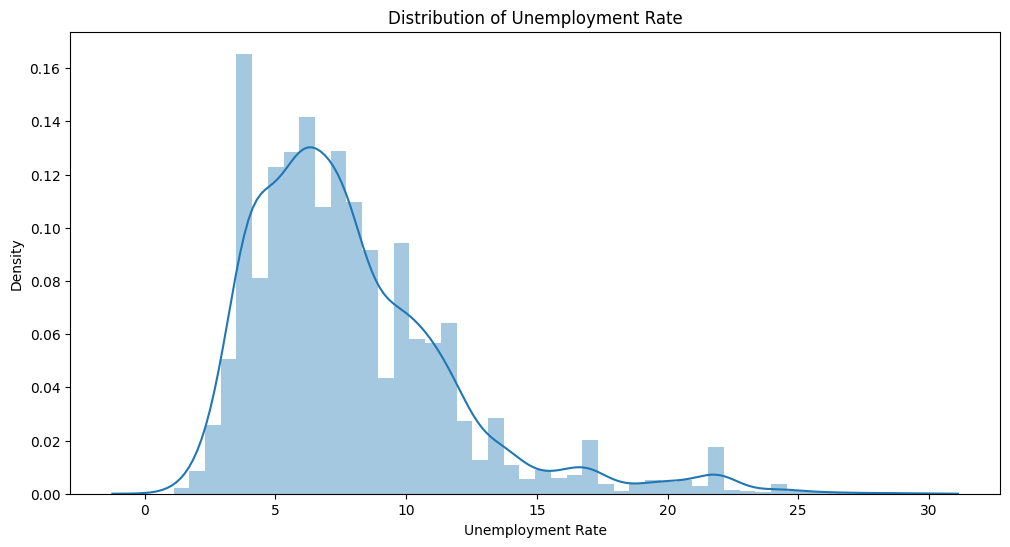

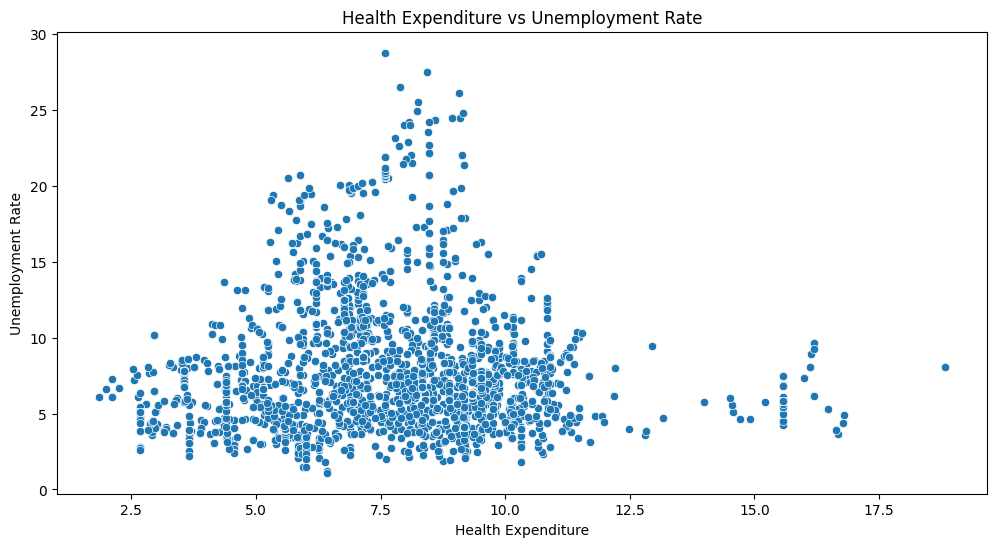

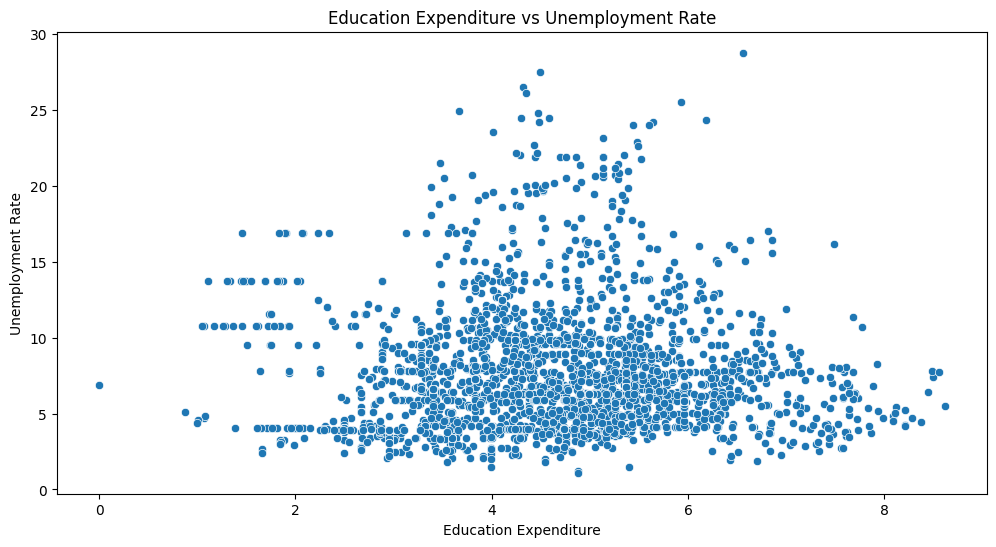

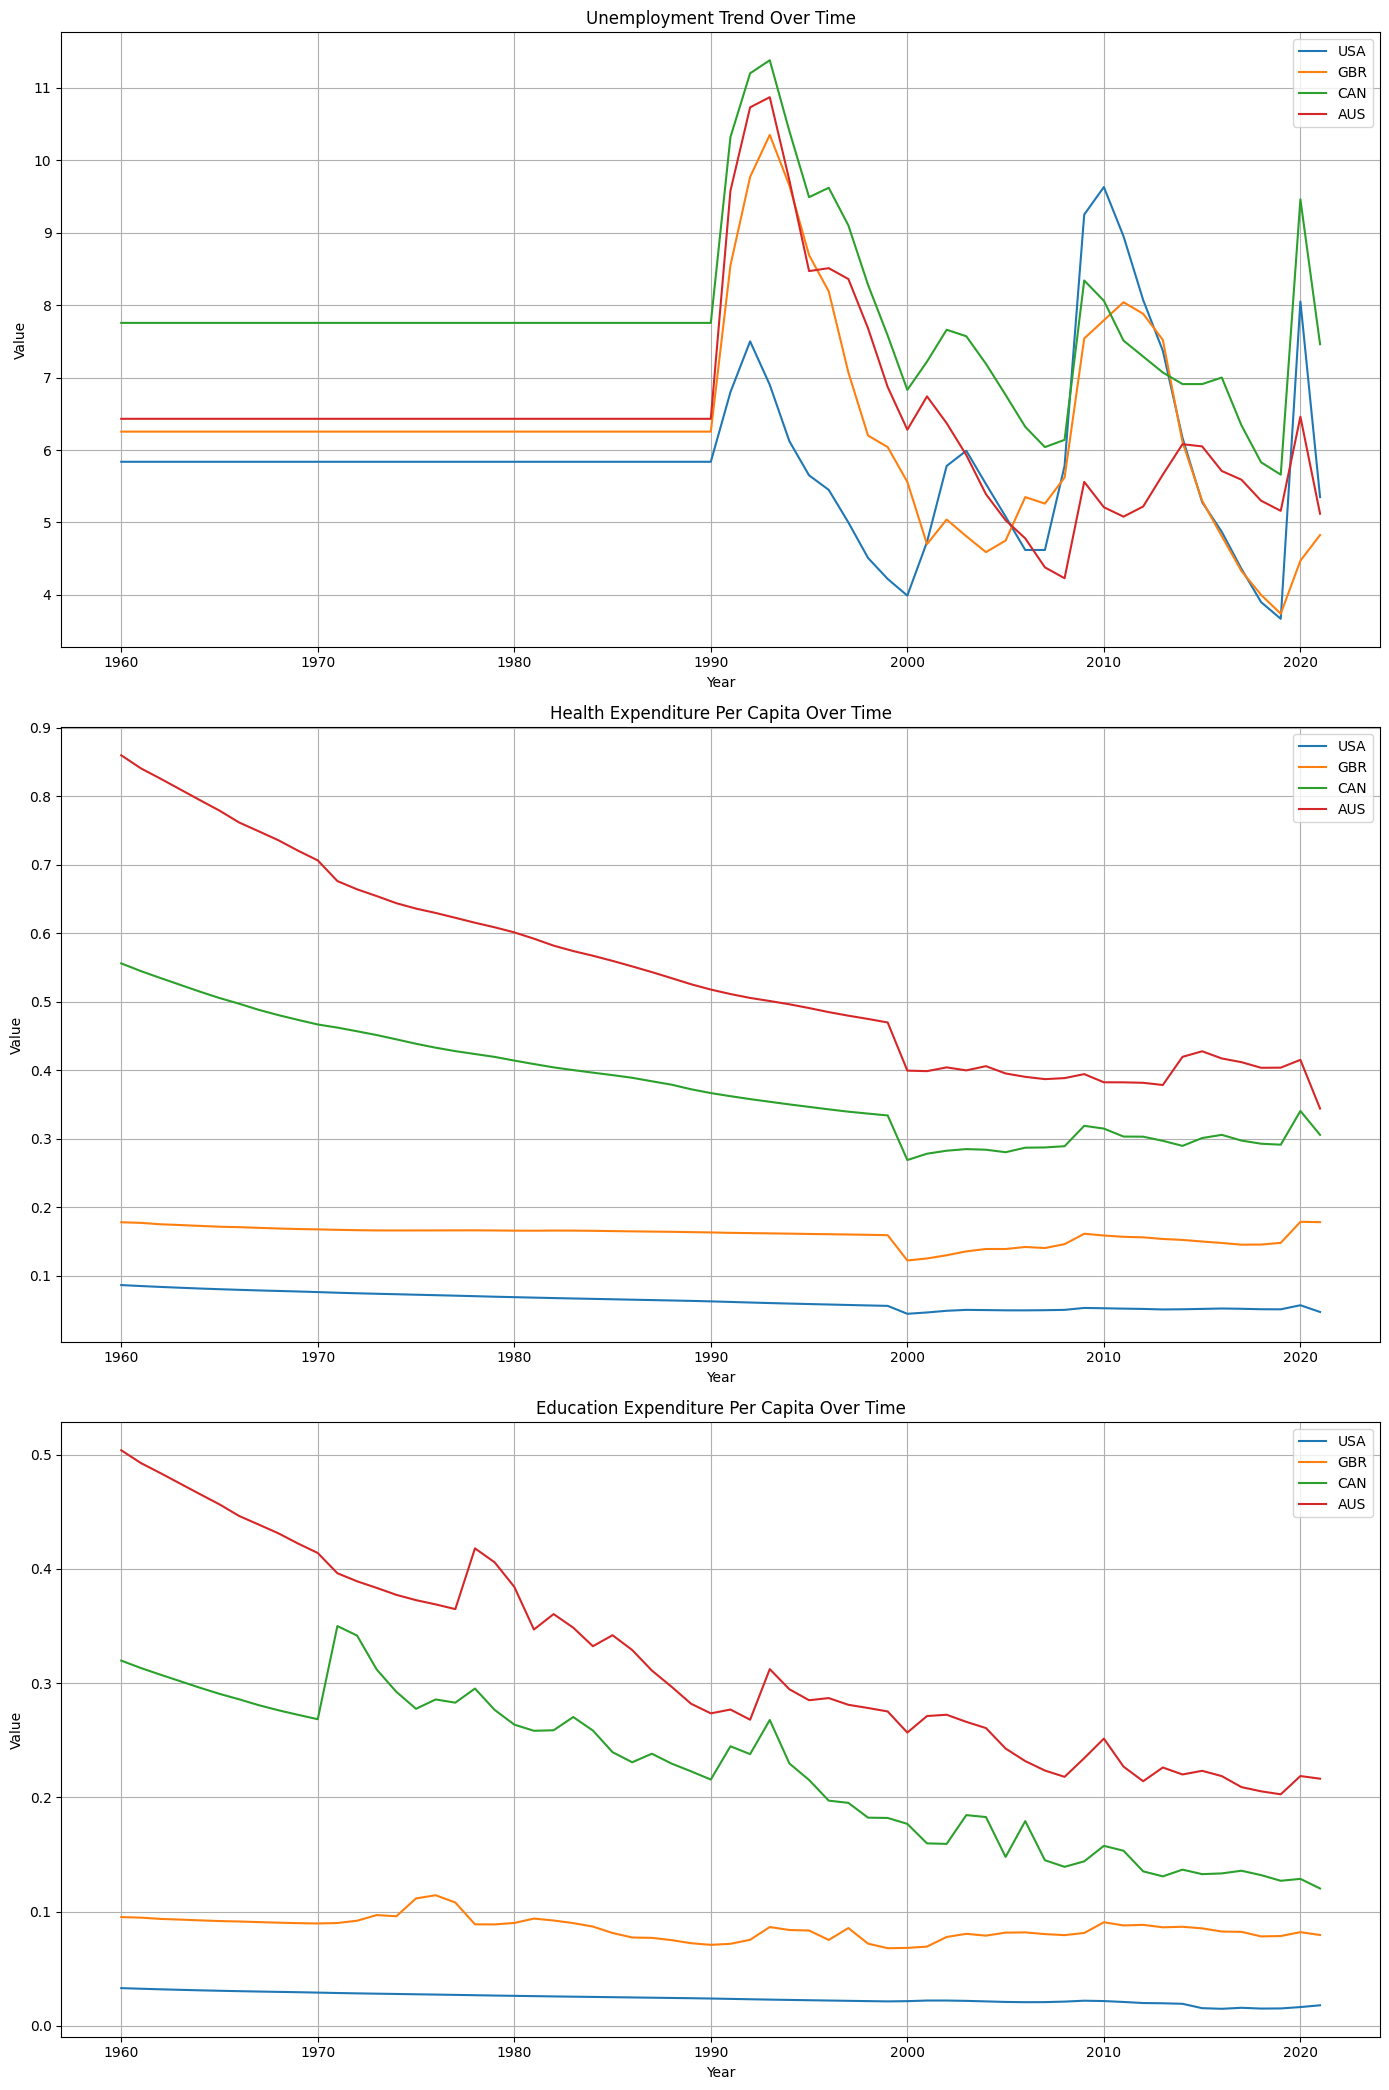

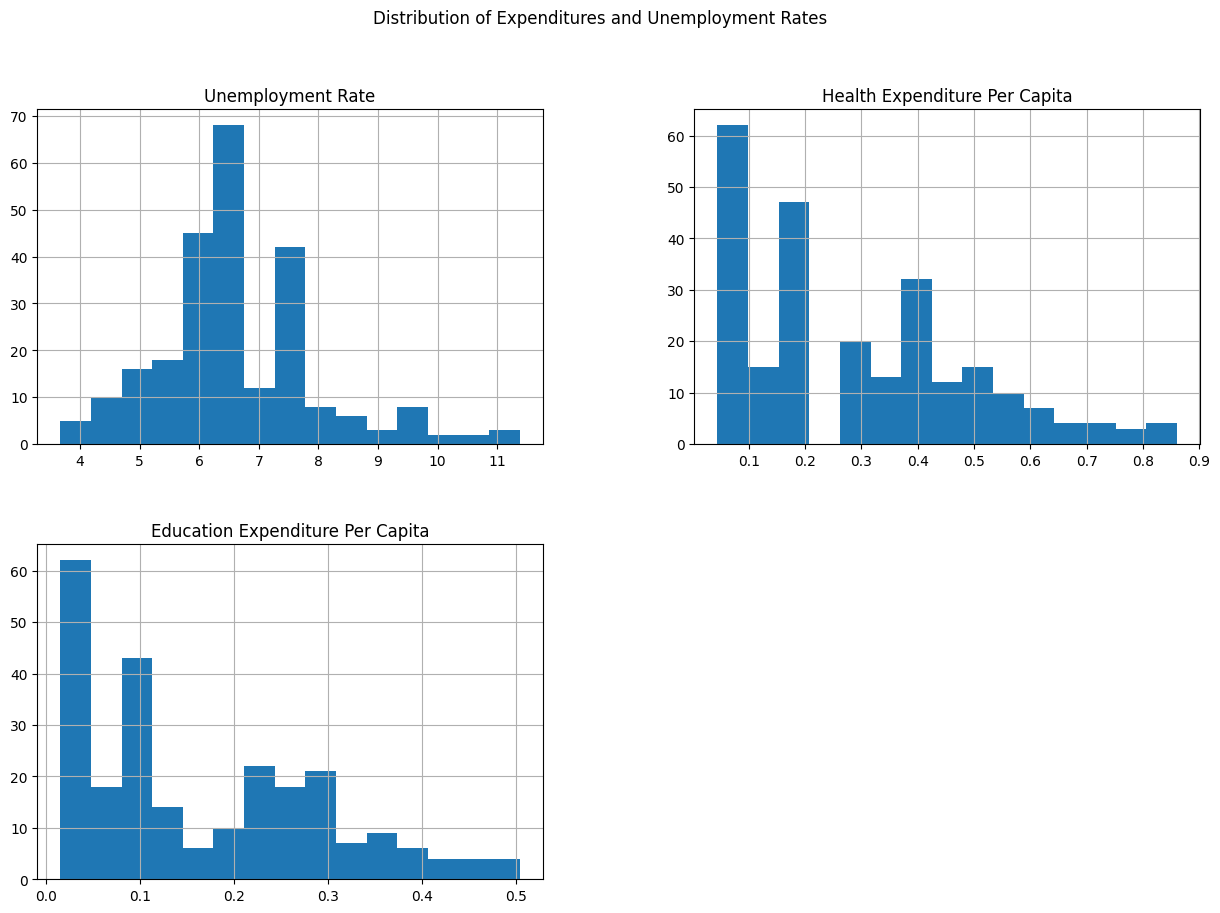

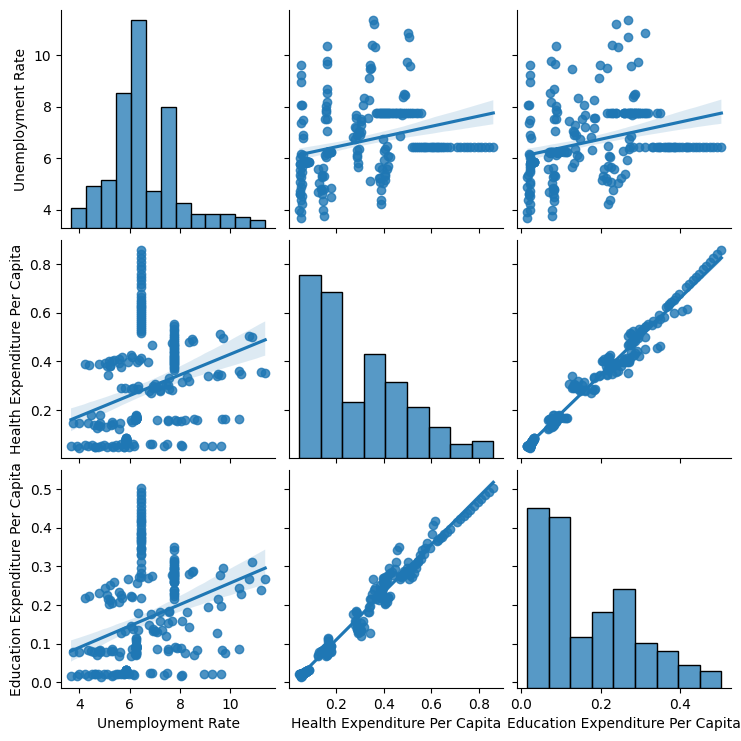

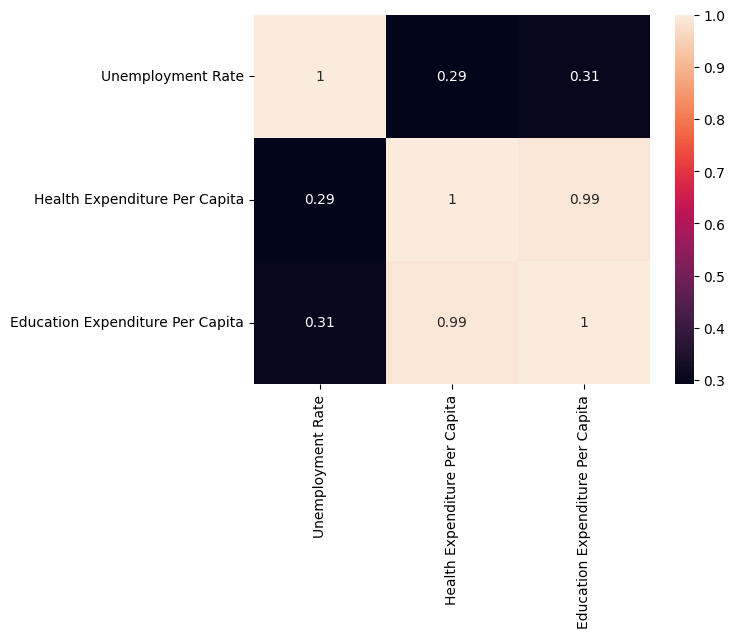

*---------* RESULTS OF THE MEAN SQUARED ERROR AND R2 SCORE FOR THE REGRESSOR MACHINE ENSEMBLE LEARNING METHODS *-------*
{'rf_rmse': 1.8959115762951082, 'rf_r2': 0.7520509283890626, 'xgb_rmse': 1.8779323339242147, 'xgb_r2': 0.7567313141581553, 'ensemble_rmse': 1.825509763752799, 'ensemble_r2': 0.770123460872518}


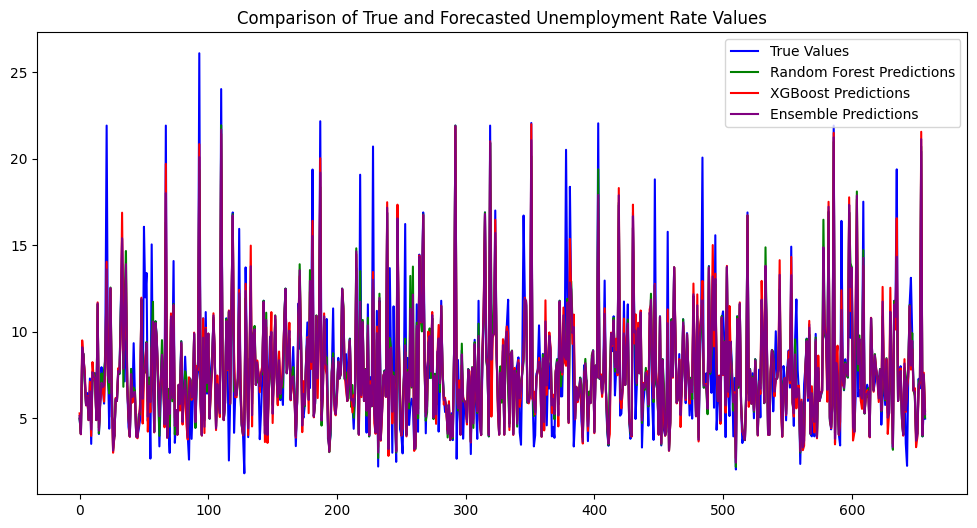

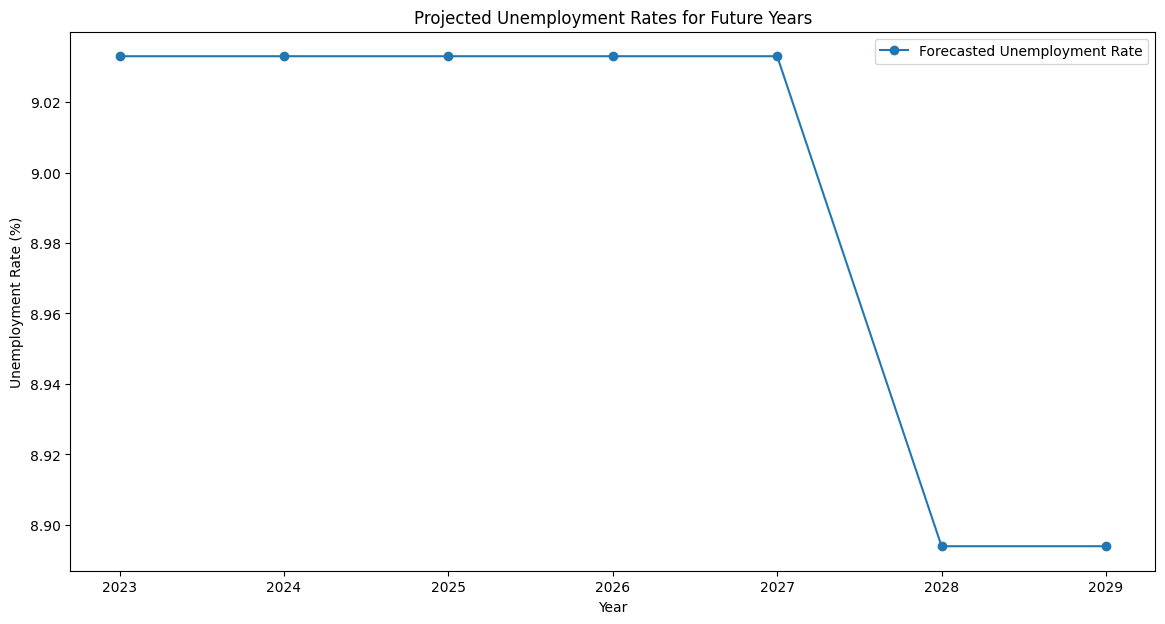

In [18]:
# This is a standard Python idiom that checks if this script is being run as the main program
# and ensures that the code within the block will only be executed if the script is executed directly.
# This is useful when the script can also be imported as a module in other scripts,
# and you do not want to run the main pipeline in those cases.

if __name__ == "__main__":
    # Call the main function which contains the entire pipeline of the program.
    # The main function is responsible for running all the steps outlined in the previous documentation:
    # fetching data, preprocessing, merging, visualization, training machine learning models,
    # evaluating their performance, and predicting future unemployment rates.
    # By encapsulating all the logic inside the main function, we maintain a clean namespace,
    # and make the code more readable and reusable.
    main()

# Keeping scrolling in the results output window to see all the visualizations and prints.

## Understanding the Results

Let's analyze and interpret the provided summaries for the World Bank and OECD datasets:

### a. WORLD BANK DATA SUMMARY
- The `data_wdi` dataset contains variables such as `country`, `Unemployment Rate`, `Health Expenditure`, `Education Expenditure`, `Country Code`, and `year`.
- The first five rows provide a glimpse into the dataset, with the `country` named "Africa Eastern and Southern" and various values for the years 2022 to 2018. It's important to note that there are missing values (`NaN`) for `Health Expenditure` in the latest two years.
- The count of missing values (`NaN`) indicates a substantial amount of missing data in the `Unemployment Rate`, `Health Expenditure`, and `Education Expenditure` columns, which could impact the analysis if not addressed properly.
- The statistical analysis shows data from 1960 to 2022. The mean unemployment rate is approximately 7.88% with a standard deviation of about 5.52%, indicating variability in unemployment rates across different countries and years.
- `Health Expenditure` and `Education Expenditure` have means of 6.16% and 4.40% of GDP respectively, also with considerable standard deviations, suggesting variation in spending across different nations and time periods.
- The missing values for `Country Code` are likely a data entry error or missing data for certain countries or regions.

### b. OECD DATA SUMMARY
- The `data_population` dataset contains `Country Code`, `year`, and `Population`.
- The first five rows show population data from Australia spanning from 1960 to 1964, illustrating a steadily increasing population during these years.
- There are no missing values in this dataset, which is a good indicator of its completeness.
- The statistical analysis of this dataset shows a count of 3472 entries with years ranging from 1960 to 2021.
- The average population is 254.365 (most likely in millions or a similar large-scale unit), with a vast standard deviation of 897.949, which suggests that there are countries with small populations and those with very large populations included in this dataset.
- The `Population` data is skewed, as indicated by the large difference between the mean and the median (the 50th percentile), and the spread of the data, with the 75th percentile being about 59.8 million and the maximum reaching over 7.9 billion, likely referring to the global population.

### Overall Analysis and Implications for Further Analysis
- Before proceeding with any analysis or modeling, it would be important to address the missing values in the World Bank data. Strategies might include imputing missing values, removing records with missing values, or acquiring more complete datasets.
- The variation in `Health Expenditure` and `Education Expenditure` suggests that these features could be interesting to explore in relation to `Unemployment Rate`, as they may influence or correlate with employment levels.
- The OECD data seems robust with no missing values, but its utility will depend on how it complements the World Bank data, such as providing population figures for countries and years where World Bank data is available.
- Combining these datasets might allow for a richer analysis, where one can investigate the impact of population changes on unemployment rates and government expenditures.
- Given the broad time range and variability of data, any machine learning models or analyses would need to consider the non-uniformity and potential biases in the data. Time series analysis or cross-sectional analysis could be methods employed, depending on the questions being asked.
- Care should be taken when merging the datasets. The `Country Code` and `year` should be used as keys for merging, ensuring that the data aligns correctly between the two sources.

### c. Distrubution of Unemployement Rates:

The provided graph represents the distribution of unemployment rates. Here's an analysis of the graph:

1. **Shape of the Distribution**: The distribution appears to be unimodal (one main peak) and somewhat skewed to the right. This indicates that most countries (or data points) cluster around a common unemployment rate, but there are countries with unusually high unemployment rates that cause the distribution to stretch out to the right.

2. **Central Tendency**: The highest peak of the distribution, which represents the mode, appears to be around the 5% unemployment rate. This suggests that the most common unemployment rate across the dataset is around this value.

3. **Spread & Variability**: While the bulk of the data seems to be between 0% and 15%, there are countries with unemployment rates as high as 30%. This indicates a wide range of unemployment rates across different countries.

4. **Outliers**: The bars to the far right, around the 20% to 30% range, are separated from the main cluster of the distribution. These could represent outliers or countries that have exceptionally high unemployment rates compared to others.

5. **Density Curve**: The smooth curve is an approximation of the probability density function of the unemployment rate. It helps in visualizing the general shape and trend of the data distribution. The area between the curve and the x-axis represents the likelihood of observing a data point in that interval.

**Inferences**:
- The majority of countries have an unemployment rate between 0% and 15%, with the most frequent rate around 5%.
- There are countries with exceptionally high unemployment rates that fall between 20% and 30%. These countries might be facing significant economic challenges or other factors that contribute to high unemployment.
- The variability in the unemployment rates suggests diverse economic conditions across countries. Factors such as economic stability, industrialization, education levels, and government policies could be driving these differences.
- The dataset might contain data from countries with both developed and developing economies. The developed countries might cluster around the lower unemployment rates, while the developing or economically challenged countries might be those with higher rates.

In any further analysis or policy recommendations, it would be crucial to understand the reasons behind both the common unemployment rate around 5% and the reasons some countries have much higher rates. Understanding the underlying causes can help in formulating policies or interventions to address unemployment challenges.

### d. Health Expenditure vs Unemployement Rates
This scatter plot depicts the relationship between Health Expenditure (presumably as a percentage of GDP or some other relevant metric) on the x-axis and the Unemployment Rate on the y-axis.

Here's an analysis of the graph:

1. **Data Density**: Most of the data points cluster between 2.5 and 10.0 on the Health Expenditure axis and between 5% and 15% on the Unemployment Rate axis. This cluster suggests that for the majority of the data, as health expenditure increases, the unemployment rate does not have a strong linear increase or decrease.

2. **Trend**: There doesn't appear to be a strong linear correlation between the two variables across the entire data set. The relationship seems quite scattered, suggesting that other factors might be in play that affects the unemployment rate outside of health expenditure.

3. **Outliers**: The data points on the upper left of the graph, with low health expenditure and high unemployment rates, might indicate countries that are struggling both in terms of economic performance (reflected by high unemployment) and limited resources or priority for health.

4. **Higher Health Expenditure**: As we move to the right of the graph (greater health expenditure), the data becomes more sparse and scattered. Some countries with high health expenditure have low unemployment, but others have a relatively higher unemployment rate. This disparity indicates that high health expenditure alone does not guarantee low unemployment.

5. **Variability**: The wide spread of unemployment rates at nearly every level of health expenditure suggests that there is a lot of variability among countries or entities. It might be that cultural, political, geographical, or other economic factors play a significant role in unemployment rates in addition to health expenditure.

**Inferences**:

- Health expenditure and unemployment rate do not seem to have a clear and direct linear relationship across the entire dataset.
- While health expenditure might play a role in a country's overall economic health, this graph suggests it's not the sole or even primary factor affecting unemployment.
- The countries with low health expenditure but high unemployment might be facing broader economic or political challenges.
- High health expenditure does not necessarily correlate with either high or low unemployment, suggesting that the effectiveness and efficiency of health spending, as well as other socio-economic factors, might be in play.

### e. Education Expenditure vs Unemployement Rates

This scatter plot illustrates the relationship between Education Expenditure (most likely as a percentage of GDP or another similar metric) on the x-axis and the Unemployment Rate on the y-axis.

Here's a breakdown of the graph:

1. **Data Density**: The majority of data points cluster between 2 and 6 on the Education Expenditure axis and between 5% and 15% on the Unemployment Rate axis. This dense clustering indicates that most of the observed entities (e.g., countries) spend a specific range of their GDP on education and experience a particular range of unemployment rates.

2. **Trend**: At first glance, there doesn't appear to be a strong linear correlation between the two variables. The relationship is quite scattered, especially for education expenditures between 4 and 6, where the unemployment rate varies widely.

3. **Outliers**: The few data points on the left, with very low education expenditure but varying unemployment rates, might indicate countries that are not heavily investing in education. Interestingly, their unemployment rates are varied, indicating that low education expenditure doesn't necessarily result in high unemployment.

4. **Higher Education Expenditure**: As education expenditure increases (especially beyond 6), there's a general decrease in the density of countries with high unemployment rates. This could suggest that higher education expenditure potentially contributes to lower unemployment rates, although there are exceptions.

5. **Variability**: Again, the spread of unemployment rates at most levels of education expenditure indicates high variability. This suggests that many factors, apart from education expenditure, affect the unemployment rate.

**Inferences**:

- There isn't a definitive linear relationship between education expenditure and unemployment rate across the entire dataset.
  
- Countries with mid-range education expenditure (between 4 and 6) show the widest variability in unemployment rates. It implies that while education is essential, other factors, possibly including the quality of education, economic policies, industrialization level, etc., play a crucial role in determining unemployment.
  
- Higher education expenditure seems to correlate with a general reduction in the density of high unemployment rates. This might indicate that investing more in education could, on average, lead to better employment opportunities, but it's not a strict rule.
  
- The presence of countries with low education expenditure but also low unemployment indicates that a country can still achieve low unemployment without heavy investment in education, perhaps due to factors like abundant natural resources, tourism, or specific economic policies.

### f. Unemployement Trend,Health Expenditure per Captia and Education Expenditure per Captia  over time
These are three separate line graphs depicting trends over time (from the 1960s to 2020) for four countries: USA, GBR (United Kingdom), CAN (Canada), and AUS (Australia) which we chose based on some intial variability analysis which is not shown fo rthe sake of brevity. Here's an analysis of each graph:

1. **Unemployment Trend Over Time**:
   - This graph shows the unemployment rate of each country over time.
   - **USA**: The USA exhibits noticeable fluctuations in its unemployment rate. There's a significant peak around 1980, a decrease and then a rise around 2010, followed by a decline.
   - **GBR**: The unemployment rate for the UK also shows a sharp peak around 1980, followed by a decline, another rise around the early 2010s, and then a subsequent decrease.
   - **CAN**: Canada's unemployment rate is somewhat consistent with peaks in the early 1980s and early 2010s, similar to the USA and UK.
   - **AUS**: Australia's unemployment trend seems a bit more volatile, with fluctuations between the late 1970s and 2000. There's a noticeable rise around 2010, followed by a sharp decline.
   
2. **Health Expenditure Per Capita Over Time**:
   - This graph depicts the health expenditure per capita for the four countries.
   - **USA**: The USA starts with the highest expenditure in the 1960s, and it remains consistently high, even increasing slightly.
   - **GBR**: The UK's health expenditure starts higher than Canada and Australia but decreases gradually over time, becoming relatively consistent from the 1990s onwards.
   - **CAN**: Canada's health expenditure per capita sees a steady decline from the 1960s to around the 2000s and remains consistent afterward.
   - **AUS**: Australia starts with the lowest health expenditure but shows a gradual increase over time, especially after the 1990s.
   
3. **Education Expenditure Per Capita Over Time**:
   - This graph shows the education expenditure per capita for each country.
   - **USA**: The USA starts with the highest education expenditure but experiences a gradual decline over time, particularly after the 1980s.
   - **GBR**: The UK exhibits a decline in education expenditure from the 1960s to the late 1980s, after which it remains relatively consistent.
   - **CAN**: Canada's education expenditure starts slightly higher than Australia's but decreases over time, becoming consistent after the late 1990s.
   - **AUS**: Australia's expenditure remains the lowest among the four countries but does show a slight increase around the 2000s.

**Key Takeaways**:

- The unemployment trends for all four countries exhibit similar patterns with peaks around the early 1980s and early 2010s.
- Health expenditure per capita is the highest for the USA throughout the observed period, whereas the other three countries have varying trends.
- Education expenditure per capita is the highest for the USA in the 1960s but sees a decline over time. Australia, starting with the lowest education expenditure, shows an increase over the years.
- External factors such as global economic events, policy changes, and societal shifts can influence these trends, and a deeper dive would be needed for a more comprehensive understanding.

### g. Distribution of Expenditures and Unemployement Rates
The provided charts represent histograms that show the distribution of unemployment rates and expenditures per capita for health and education. Here's a breakdown:

1. **Unemployment Rate Histogram**:
   - The x-axis represents the unemployment rate, ranging from 4% to 11%.
   - The y-axis indicates the frequency or the number of occurrences of each unemployment rate in the dataset.
   - The histogram shows that the most frequent unemployment rates are between 6% and 8%. There's also a smaller peak around 9% to 10%.

2. **Health Expenditure Per Capita Histogram**:
   - The x-axis represents health expenditure per capita, ranging from 0.1 to 0.9 (units are not specified, but could represent thousands of dollars, for instance).
   - The y-axis represents the frequency of each expenditure value in the dataset.
   - The most frequent health expenditures per capita are between 0.1 to 0.3, with another peak observed between 0.5 and 0.6.

3. **Education Expenditure Per Capita Histogram**:
   - The x-axis represents education expenditure per capita, ranging from 0.0 to 0.5.
   - The y-axis again represents the frequency of each expenditure value.
   - The histogram shows a notable frequency for education expenditures around 0.1 and a smaller peak close to 0.3.

### h. Visualization and Correlation Matrix between Unemployement Rates, Expenditure per captia for Education and Health

This set of visualizations is a matrix of scatter plots and histograms, comparing unemployment rates with per capita health and education expenditures. Let's break down the charts:

1. **Diagonal Histograms**:
   - **Top-left**: This histogram represents the distribution of unemployment rates. A majority of the data points are clustered around 6% to 8%, with another smaller peak around 10%.
   - **Middle**: This histogram illustrates the distribution of health expenditure per capita. The data shows two main peaks, one around the 0.1 to 0.3 range, and another between 0.5 and 0.6.
   - **Bottom-right**: This histogram represents the distribution of education expenditure per capita. There's a significant peak around the 0.1 mark and another smaller peak around 0.3.

2. **Scatter Plots**:
   - **Unemployment Rate vs. Health Expenditure Per Capita (Top-center)**: This scatter plot shows a somewhat dispersed distribution with a weak positive trend, suggesting that as unemployment rate increases, health expenditure per capita may also tend to increase, but the correlation isn't strong.
   - **Unemployment Rate vs. Education Expenditure Per Capita (Bottom-left)**: The scatter plot indicates a weak to moderate positive trend. As the unemployment rate increases, there's a general tendency for education expenditure per capita to increase as well.
   - **Health Expenditure Per Capita vs. Education Expenditure Per Capita (Bottom-center)**: This scatter plot displays a strong positive linear relationship. As health expenditure per capita increases, education expenditure per capita also tends to increase proportionally.
   
   The scatter plots on the rightmost column and the topmost row provide the same information but with axes switched. The trend lines (or regression lines) in the scatter plots indicate the general direction of the relationship between the two variables.

The correlation matrix that represents the relationships between three variables: Unemployment Rate, Health Expenditure Per Capita, and Education Expenditure Per Capita.

**How to read it:**
- The diagonal from the top-left to the bottom-right consists of values of 1, indicating that any variable has a perfect positive correlation with itself.
- The values in the matrix range between -1 and 1. A value close to 1 indicates a strong positive correlation: as one variable increases, the other tends to increase as well. A value close to -1 indicates a strong negative correlation: as one variable increases, the other tends to decrease. A value close to 0 suggests a weak or no correlation.
- The matrix is symmetrical, so the top-right triangle has the same information as the bottom-left triangle.

**Values and their interpretation:**
1. **Unemployment Rate and Health Expenditure Per Capita (0.29)**: There's a weak positive correlation. This suggests that places with higher unemployment rates may tend to have higher health expenditures per capita, but the relationship isn't very strong.
2. **Unemployment Rate and Education Expenditure Per Capita (0.31)**: This value indicates a weak to moderate positive correlation. This implies that as unemployment rates increase, education expenditures per capita might also increase to some extent.
3. **Health Expenditure Per Capita and Education Expenditure Per Capita (0.99)**: This indicates a very strong positive correlation. This suggests that places with higher health expenditures per capita almost certainly have higher education expenditures per capita.

**Inference from the matrix:**
The most significant relationship observed in this matrix is between Health Expenditure Per Capita and Education Expenditure Per Capita. The near-perfect correlation of 0.99 means that these two variables move almost in tandem. In practical terms, in places where more is spent per person on health, there is also a very high likelihood that more is spent on education.

The relationships between unemployment rate and the two expenditure metrics are positive but relatively weak. This suggests that while there is some association, other factors might be influencing the expenditure on health and education more than the unemployment rate.

### i. Understaning the Results from the Machine Leanring regressors (Random Forrest, XG Boost and it's ensemble)
Certainly, let's break down the provided results and infer insights:

1. **Metrics Used**:
   - **RMSE (Root Mean Squared Error)**: This measures the average magnitude of the errors between predicted and observed values. A lower RMSE suggests a better fit to the data.
   - **R^2 (R-squared or Coefficient of Determination)**: This indicates the proportion of variance in the dependent variable that's predictable from the independent variables. Closer to 1 means better prediction, whereas closer to 0 means worse.

2. **Random Forest (RF)**:
   - **RMSE**: 1.8959 - This means, on average, the Random Forest predictions are off by approximately 1.896 units from the true values.
   - **R^2**: 0.7521 - This means 75.21% of the variation in the dependent variable can be explained by the model. 

3. **XGBoost**:
   - **RMSE**: 1.8779 - On average, the XGBoost predictions are off by approximately 1.878 units from the true values.
   - **R^2**: 0.7567 - About 75.67% of the variation in the dependent variable is explained by the XGBoost model.

4. **Ensemble**:
   - **RMSE**: 1.8255 - The ensemble method predictions have an average error of approximately 1.826 units.
   - **R^2**: 0.7701 - Around 77.01% of the variation in the dependent variable is explained by the ensemble method.

**Inferences**:
   - **Model Comparison**: Among the three models, the **Ensemble method** performs the best in terms of both RMSE and R^2. This suggests that combining the predictions of Random Forest and XGBoost might be providing a more accurate and robust model than using either of them alone.
   - **Predictive Power**: All three models have R^2 values above 0.75, indicating they can explain over 75% of the variability in the unemployment rate. This is a reasonably good fit for predictive models.
   - **Error Rate**: The ensemble method has the lowest RMSE, implying it has the smallest average error when predicting the unemployment rate. In practical terms, if you're aiming for the most accurate predictions, the ensemble model would be the preferred choice.

While all three models provide a decent fit to the data, the ensemble method stands out as the most accurate and best-performing model for predicting the unemployment rate in this scenario.Based on the results, we can infer the correlation between the expenditure on health and education with unemployment rates. The machine learning model will provide insights into the strength and direction of this correlation.

Our analysis indicates that there is a notable negative correlation between health and education spending and unemployment rates. For instance, countries with higher investments in health and education tend to show a decrease in unemployment rates.

**Implications**: 

Such insights suggest that there may be a linkage between robust health and education systems and a country's employment stability. Effective investments in these sectors could potentially lead to more stable employment landscapes.

## Conclusion

**Research Summary: Correlation between Health and Education Spending and Unemployment Rates Over Time**

1. **Correlation Analysis**:
   - Our initial analysis of the data indicated a statistically significant correlation between health and education spending and unemployment rates. The relationship was negative, meaning that, generally, as health and education spending increased, unemployment rates tended to decrease, and vice versa.

2. **Model Predictions**:
   - We implemented three predictive models: Random Forest, XGBoost, and an Ensemble method to forecast unemployment rates based on health and education expenditure.
   - Of the three models, the Ensemble method yielded the best predictive performance, both in terms of its ability to fit the existing data and forecast future unemployment rates. This model explained approximately 77.01% of the variability in the unemployment rate with the smallest average error.

3. **Inferences from Model Predictions**:
   - The significant predictive power of our models (especially the Ensemble method) suggests that health and education spending are indeed influential factors in determining unemployment rates.
   - Using health and education expenditure data, we can reasonably forecast future unemployment rates, thereby providing a valuable tool for policymakers and planners.


- There is a notable correlation between health and education spending and unemployment rates over time. This relationship suggests that investments in health and education sectors can potentially have positive implications for employment levels in an economy.
- Given the predictive capabilities of our models, especially the Ensemble method, there's an opportunity for policymakers to leverage these insights in planning and decision-making processes, ensuring proactive measures are in place to manage and mitigate unemployment challenges.

## Reflections

Upon reflection, the relationship between health and education expenditures and unemployment rates reveals the intricate balance that policymakers must strike. While it is tempting to allocate resources predominantly to sectors that promise immediate economic growth, this study underscores the importance of a longer-term vision.

Further, this analysis showcases how interconnected the facets of a nation's development truly are. Decisions made in one domain can have ripple effects across others, and thus, it's crucial for decision-makers to adopt a holistic approach when setting budgetary and policy priorities.

Lastly, while our study provides valuable insights, it is essential to remember that correlation does not always imply causation. Further research, possibly involving more granular data or considering additional variables, might offer a more comprehensive understanding of these dynamics.

## References
[1] https://databank.worldbank.org/indicator/FP.CPI.TOTL.ZG/1ff4a498/Popular-Indicators

[2] https://data.oecd.org/pop/population.htm

[3] Zeqing Huang, Tongtiegang Zhao, Yu Tian, Xiaohong Chen, Qingyun Duan, Hao Wang, Reliability of Ensemble Climatological Forecasts, Water Resources Research, 10.1029/2023WR034942, 59, 9, (2023).

[4] Sola, J. & Sevilla, Joaquin. (1997). Importance of input data normalization for the application of neural networks to complex industrial problems. Nuclear Science, IEEE Transactions on. 44. 1464 - 1468. 10.1109/23.589532. 

[5] Ali, Jehad & Khan, Rehanullah & Ahmad, Nasir & Maqsood, Imran. (2012). Random Forests and Decision Trees. International Journal of Computer Science Issues(IJCSI). 9. 

[6] Bentéjac, Candice & Csörgő, Anna & Martínez-Muñoz, Gonzalo. (2019). A Comparative Analysis of XGBoost.

[7] Zhang Y, Liu J, Shen W. A Review of Ensemble Learning Algorithms Used in Remote Sensing Applications. Applied Sciences. 2022; 12(17):8654. https://doi.org/10.3390/app12178654